<a href="https://colab.research.google.com/github/axz91/nmr/blob/main/NMR_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install nmrglue pgwalker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 1.7 MB/s eta 0:00:00


Title: Visualization and Algorithm for In Vivo pi-SSelMQC Signal Processing in Chemical Shift Imaging Experiments: Recovering Multi-Quantum Coherence Transfer Pathways




By Hsi Chang and Qiuhong He


Murine 344SQ lung cancer mouse model; Tumor size: 10.73 x10.72 x 8.63 mm^3;    9.4T Bruker at UNC




A 256x36 matrix acquired by pulse sequence method, after 2 Fast Fourier Transforms, was visualized for different frequencies in a contour plot and a 3D line stacked plot.

The central lipid and water signals were removed.

An algorithm was applied to indicate if the sum of the neighborhood values was above the threshold. If it was, the algorithm scaled the value by 10, while keeping the other data unchanged.



Our algorithm checked each point in the grid by adding its value to the value of each neighboring point. We iterated over the neighboring points one at a time, including the points above, below, to the left, and to the right.

If the sum of the current point and any one of these neighboring points was greater than the threshold we had set, the algorithm scaled the number at that spot by 10 times. Otherwise, if the sum was not greater than the threshold, the algorithm considered the spot as noise and kept the number unchanged.

The threshold was defined as 300,000 because the sum of the signal values had to be greater than the central and largest single value in column 2 and row 8, as observed in the contour plot.


References:
Qiuhong He, Hong Yuan, and Yen-Yu Ian Shih, “Double-echo phase-incrementing SSel-MQC (pi-SSelMQC) in biomarker imaging with full signal recovery and excellent lipid and water suppression.” Proc. Intl. Soc. Mag. Reson. Med. (2023)

Development of phase-incrementing Magnetic Resonance Spectroscopic Imaging (pi-MRSI) Methods (U.S. Patent 11,604,242 B2 issued on Mar. 14, 2023)

Acknowledgement:
We thank the funding support for the small animal MRI core at UNC (P30 CA016086),, Bowles Center for Alcohol Studies (P60 AA011605), and Carolina Institute for Developmental Disabilities (U54 HD079124).

#### Data Import and Porcessing

In [ ]:
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt

# read in the data from a NMRPipe file
data_input = ng.fileio.bruker.read(
    dir='/content/drive/MyDrive/70_ENC2020/1/', bin_file="fid",
    pprog_file="pulseprogram")


data_input


In [ ]:
import numpy as np

data = data_input[1]
# Ensure that the data array length is even
if len(data) % 2 != 0:
    raise ValueError("The array length must be even to form complex numbers.")

# Split the array into real and imaginary parts
real_parts = data[0::2]
imaginary_parts = data[1::2]

# Construct complex numbers as a list
complex_numbers_list = [r + 1j*i for r, i in zip(real_parts, imaginary_parts)]

# Convert the list to a NumPy array
complex_numbers = np.array(complex_numbers_list)

# Output the complex numbers

complex_numbers_2 = complex_numbers.reshape(36, 256).T

#### Imported Matrix 256 x 36

In [ ]:
# Function to print a row of the matrix
def print_row(row):
    return '[' + '  '.join(f'({num.real:.2f}+{num.imag:.2f}j)' for num in row) + ']'

# Print the top two rows
print(print_row(complex_numbers_2[0]))
print(print_row(complex_numbers_2[1]))


# Print an abbreviated middle part
print('.\n' * 2 + ' ' * 256 + '...\n' * 2)


# Print the bottom two rows
print(print_row(complex_numbers_2[-2]))
print(print_row(complex_numbers_2[-1]))


[(-484.00+-1037.00j)  (-391.00+-112.00j)  (-425.00+-110.00j)  (-778.00+681.00j)  (627.00+452.00j)  (1145.00+552.00j)  (227.00+-2235.00j)  (1800.00+-818.00j)  (93.00+-2508.00j)  (749.00+1440.00j)  (1543.00+-2186.00j)  (-1539.00+-839.00j)  (70.00+2018.00j)  (3289.00+-177.00j)  (-139.00+-4035.00j)  (-2996.00+1833.00j)  (2339.00+684.00j)  (-1114.00+-3072.00j)  (-1392.00+1443.00j)  (2355.00+112.00j)  (2259.00+-3372.00j)  (-2832.00+267.00j)  (2761.00+2054.00j)  (1219.00+-1888.00j)  (-2369.00+58.00j)  (-689.00+863.00j)  (1484.00+-886.00j)  (-2373.00+-2421.00j)  (-1343.00+1778.00j)  (2414.00+-1153.00j)  (-1162.00+-2153.00j)  (-1350.00+204.00j)  (-731.00+1808.00j)  (-273.00+-503.00j)  (-862.00+-285.00j)  (-1211.00+1237.00j)]
[(648.00+1476.00j)  (-1516.00+783.00j)  (-1117.00+-253.00j)  (1675.00+-696.00j)  (1675.00+-1220.00j)  (1166.00+113.00j)  (-1082.00+-1599.00j)  (-1360.00+32.00j)  (2027.00+-1300.00j)  (412.00+-1735.00j)  (-3459.00+-2793.00j)  (-1888.00+2633.00j)  (2434.00+651.00j)  (-1664.00

#### Functions for ploting

In [ ]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt



import numpy as np

def perform_2d_fft(input_data):
    # FFT along axis 0
    fft_data_dim1_axis_0 = np.fft.fft(input_data, axis=0)
    # Shift the FFT data over axis 0
    fft_data_dim1_shift_0 = np.fft.fftshift(fft_data_dim1_axis_0, axes=(0))
    # FFT along axis 1
    fft_data_dim2_axis_1 = np.fft.fft(fft_data_dim1_shift_0, axis=1)
    fft_data_dim1_abs = np.abs(fft_data_dim2_axis_1)
    # Shift the FFT data over axis 1
    fft_data_dim2_shift_1 = np.fft.fftshift(fft_data_dim2_axis_1, axes=(1))
    # Get the absolute value of the shifted FFT data
    fft_data_dim2_abs = np.abs(fft_data_dim2_shift_1)
    return fft_data_dim1_abs, fft_data_dim2_abs

# Use the function with your 2048x2048 matrix of complex numbers
# Replace 'complex_numbers_2' with your actual data
fft_data_dim1_abs_orginal, fft_data_dim2_abs_orginal = perform_2d_fft(input_data = complex_numbers_2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_columns_with_offsets_no_norm_3d(data, start_column, end_column, x_offset, y_offset):
    # Create a figure and a 3D axes
    fig = plt.figure(figsize=(40, 40))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each column as a separate line with offsets
    for i in range(start_column, end_column + 1):
        x = np.arange(data.shape[0]) + i * x_offset
        y = np.full((data.shape[0],), i)  # y is a constant for each line
        z = data[:, i] + i * y_offset
        ax.plot3D(x, y, z, label=f'Spectrum {i}')

    # Add labels and title
    ax.set_xlabel('Rows (with offset)')
    ax.set_ylabel('Spectra')
    ax.set_zlabel('Non-normalized Values (with offset)')
    ax.set_title(f'Spectrum {start_column} to {end_column}', size=28)

    # Show the plot
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fft_contour(fft_data, colormap='viridis', title='Contour plot', grid_spacing=1):
    """
    Plots a contour plot of the 2D FFT data with each grid representing one numeric value.
    """
    # Generate grid for the contour plot
    x = np.arange(0, fft_data.shape[1], grid_spacing)
    y = np.arange(0, fft_data.shape[0], grid_spacing)
    X, Y = np.meshgrid(x, y)

    # Select a subset of the data at the specified grid_spacing
    fft_data_subset = fft_data[::grid_spacing, ::grid_spacing]

    # Create the contour plot
    plt.figure(figsize=(28, 28))  # Adjusted for a reasonable default size
    contour = plt.contourf(X, Y, fft_data_subset, levels=100, cmap=colormap)  # Use colormap parameter
    plt.colorbar(contour)  # Show color scale with correct range of FFT data

    # Set the ticks on the x and y axes
    plt.xticks(x)
    plt.yticks(y)

    # Set the title and labels
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

    # Add grid with spacing defined by grid_spacing
    plt.grid(True, which='both', color='lightgray', linestyle='-', linewidth=0.5)

    # Display the plot
    plt.show()

#### Preferm 2 FFT

In [ ]:
fft_data_dim1_abs_orginal, fft_data_dim2_abs_orginal = perform_2d_fft(input_data = complex_numbers_2)


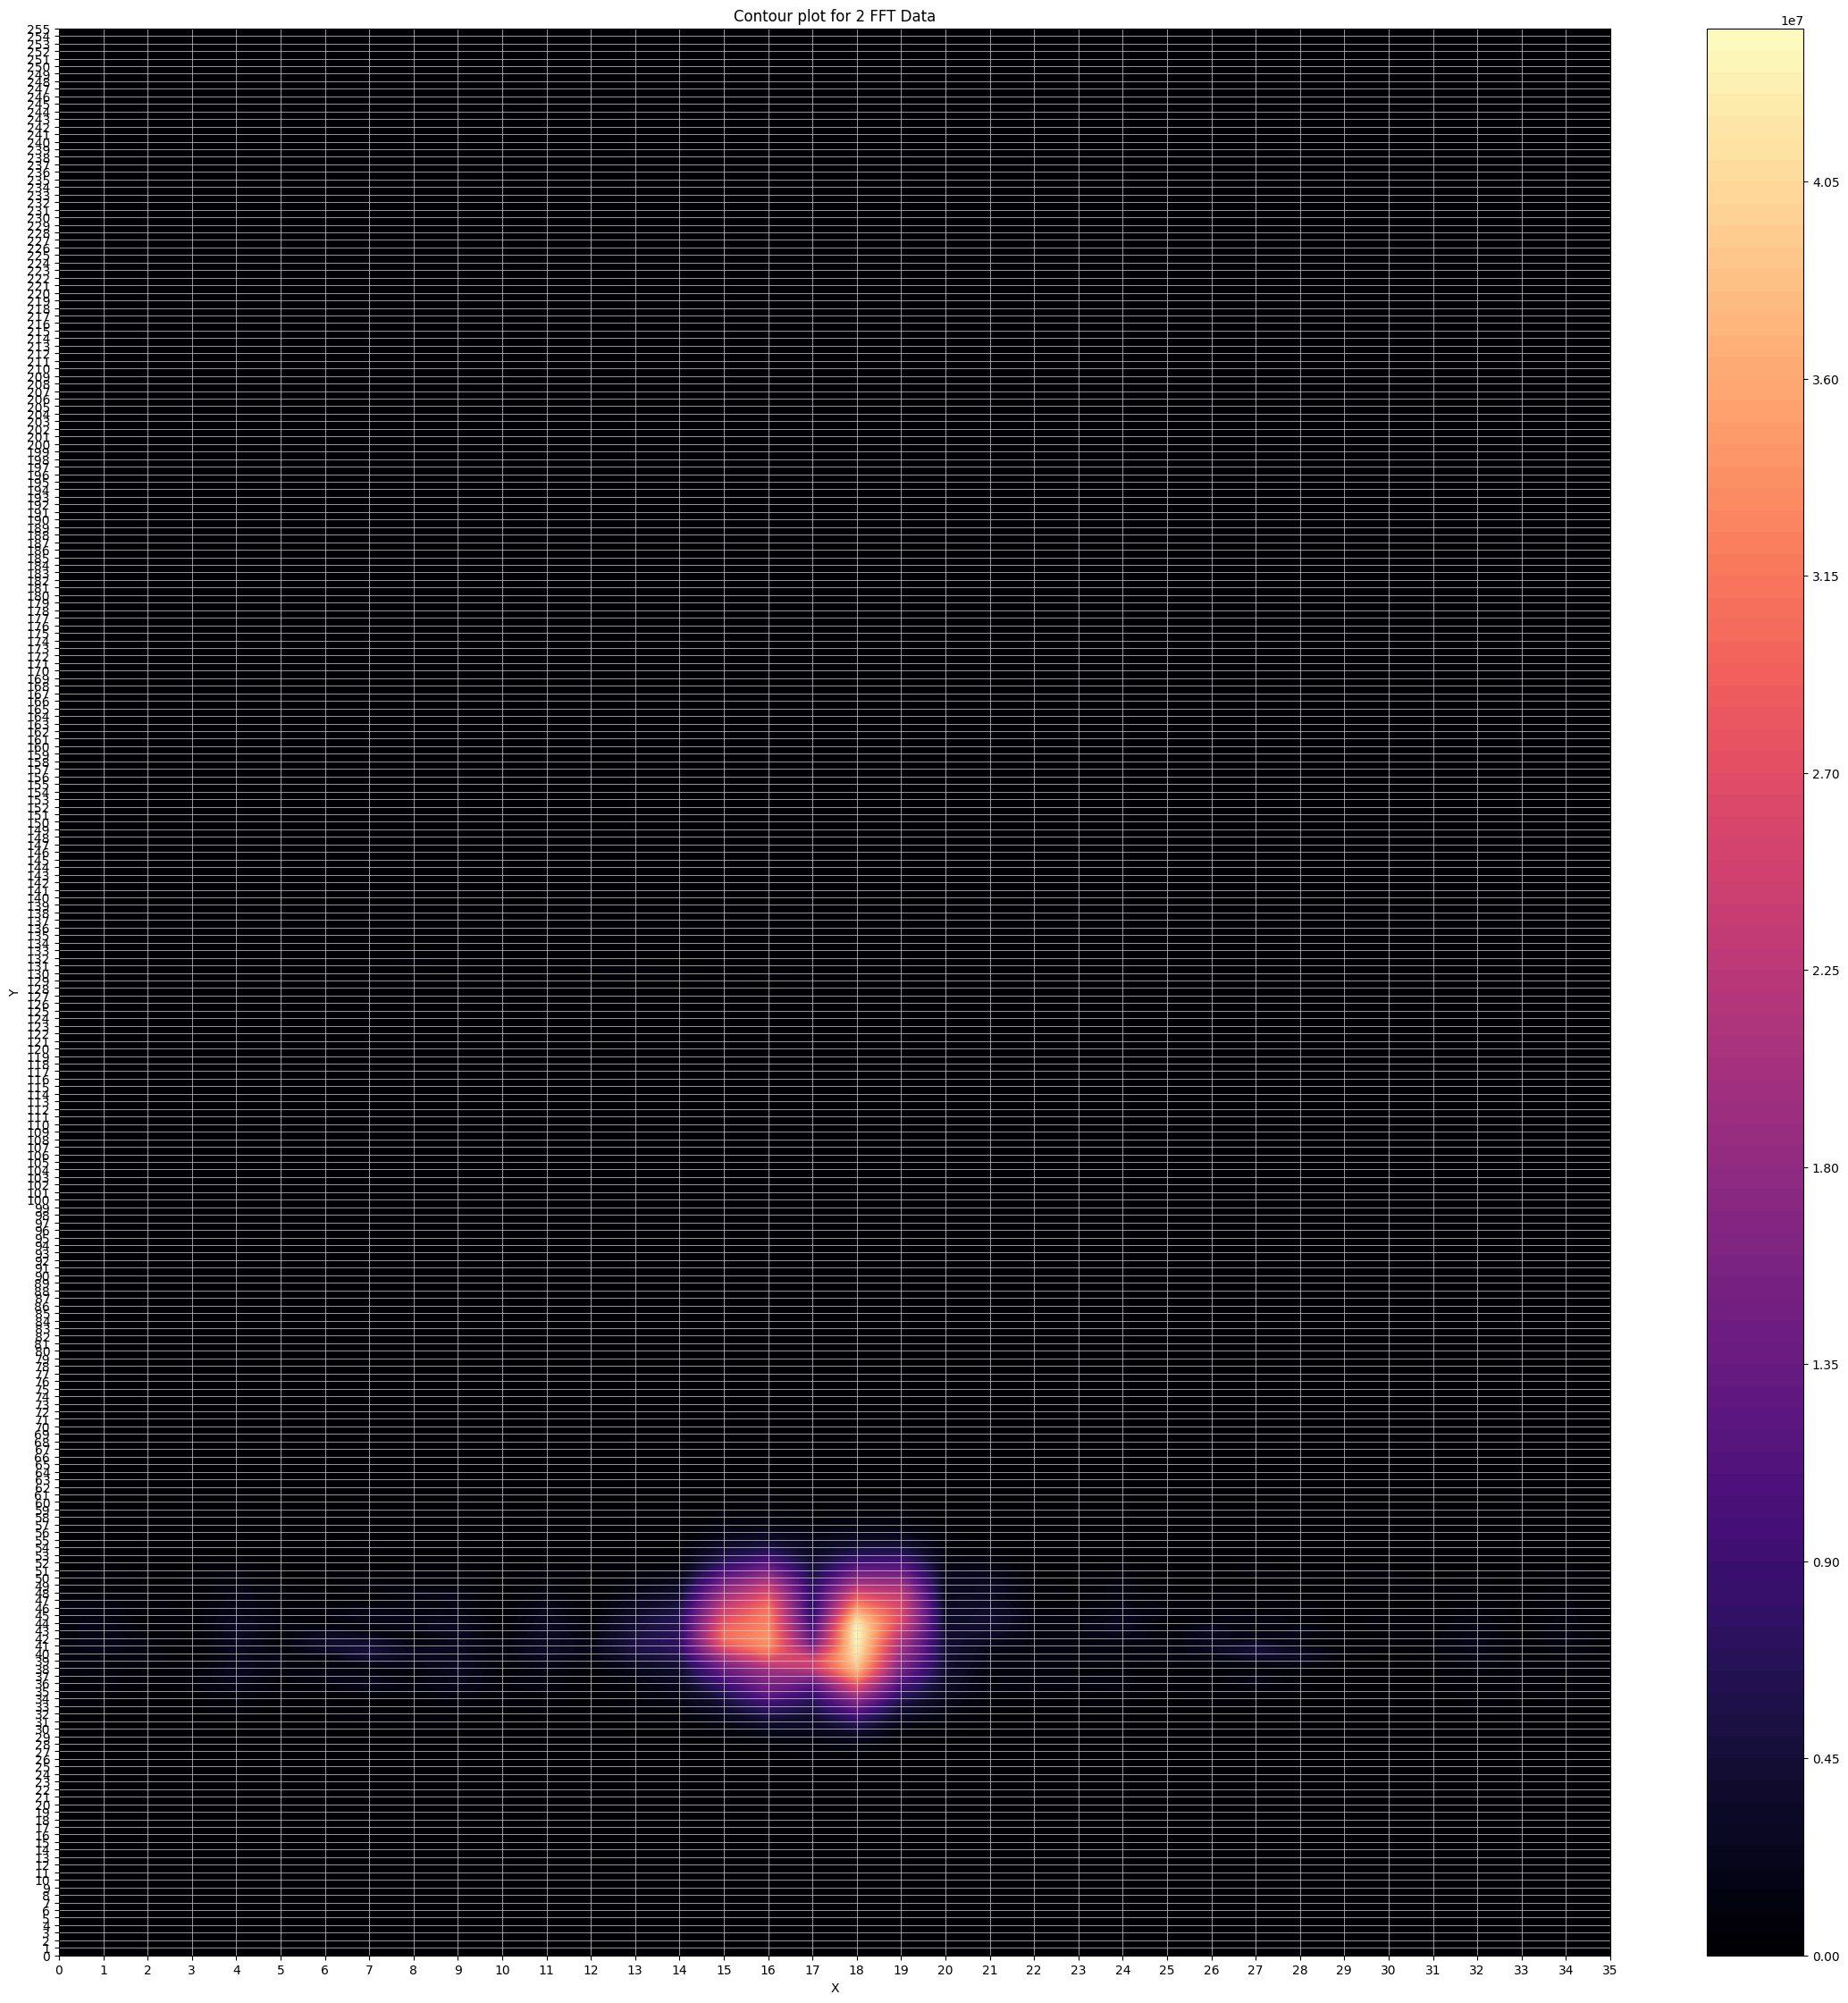

In [ ]:
plot_fft_contour(fft_data_dim2_abs_orginal, colormap='magma', title="Contour plot for 2 FFT Data")

In [ ]:
plot_columns_with_offsets_no_norm_3d(fft_data_dim2_abs_orginal,0,35,0,0)

#### Central Lipid Removed

In [ ]:
peak_remove_data = np.hstack((fft_data_dim2_abs_orginal[:, 0:11], fft_data_dim2_abs_orginal[:, 25:36]))
plot_fft_contour(peak_remove_data,  colormap='magma', title='Lipid Removed Contour plot',grid_spacing=1)

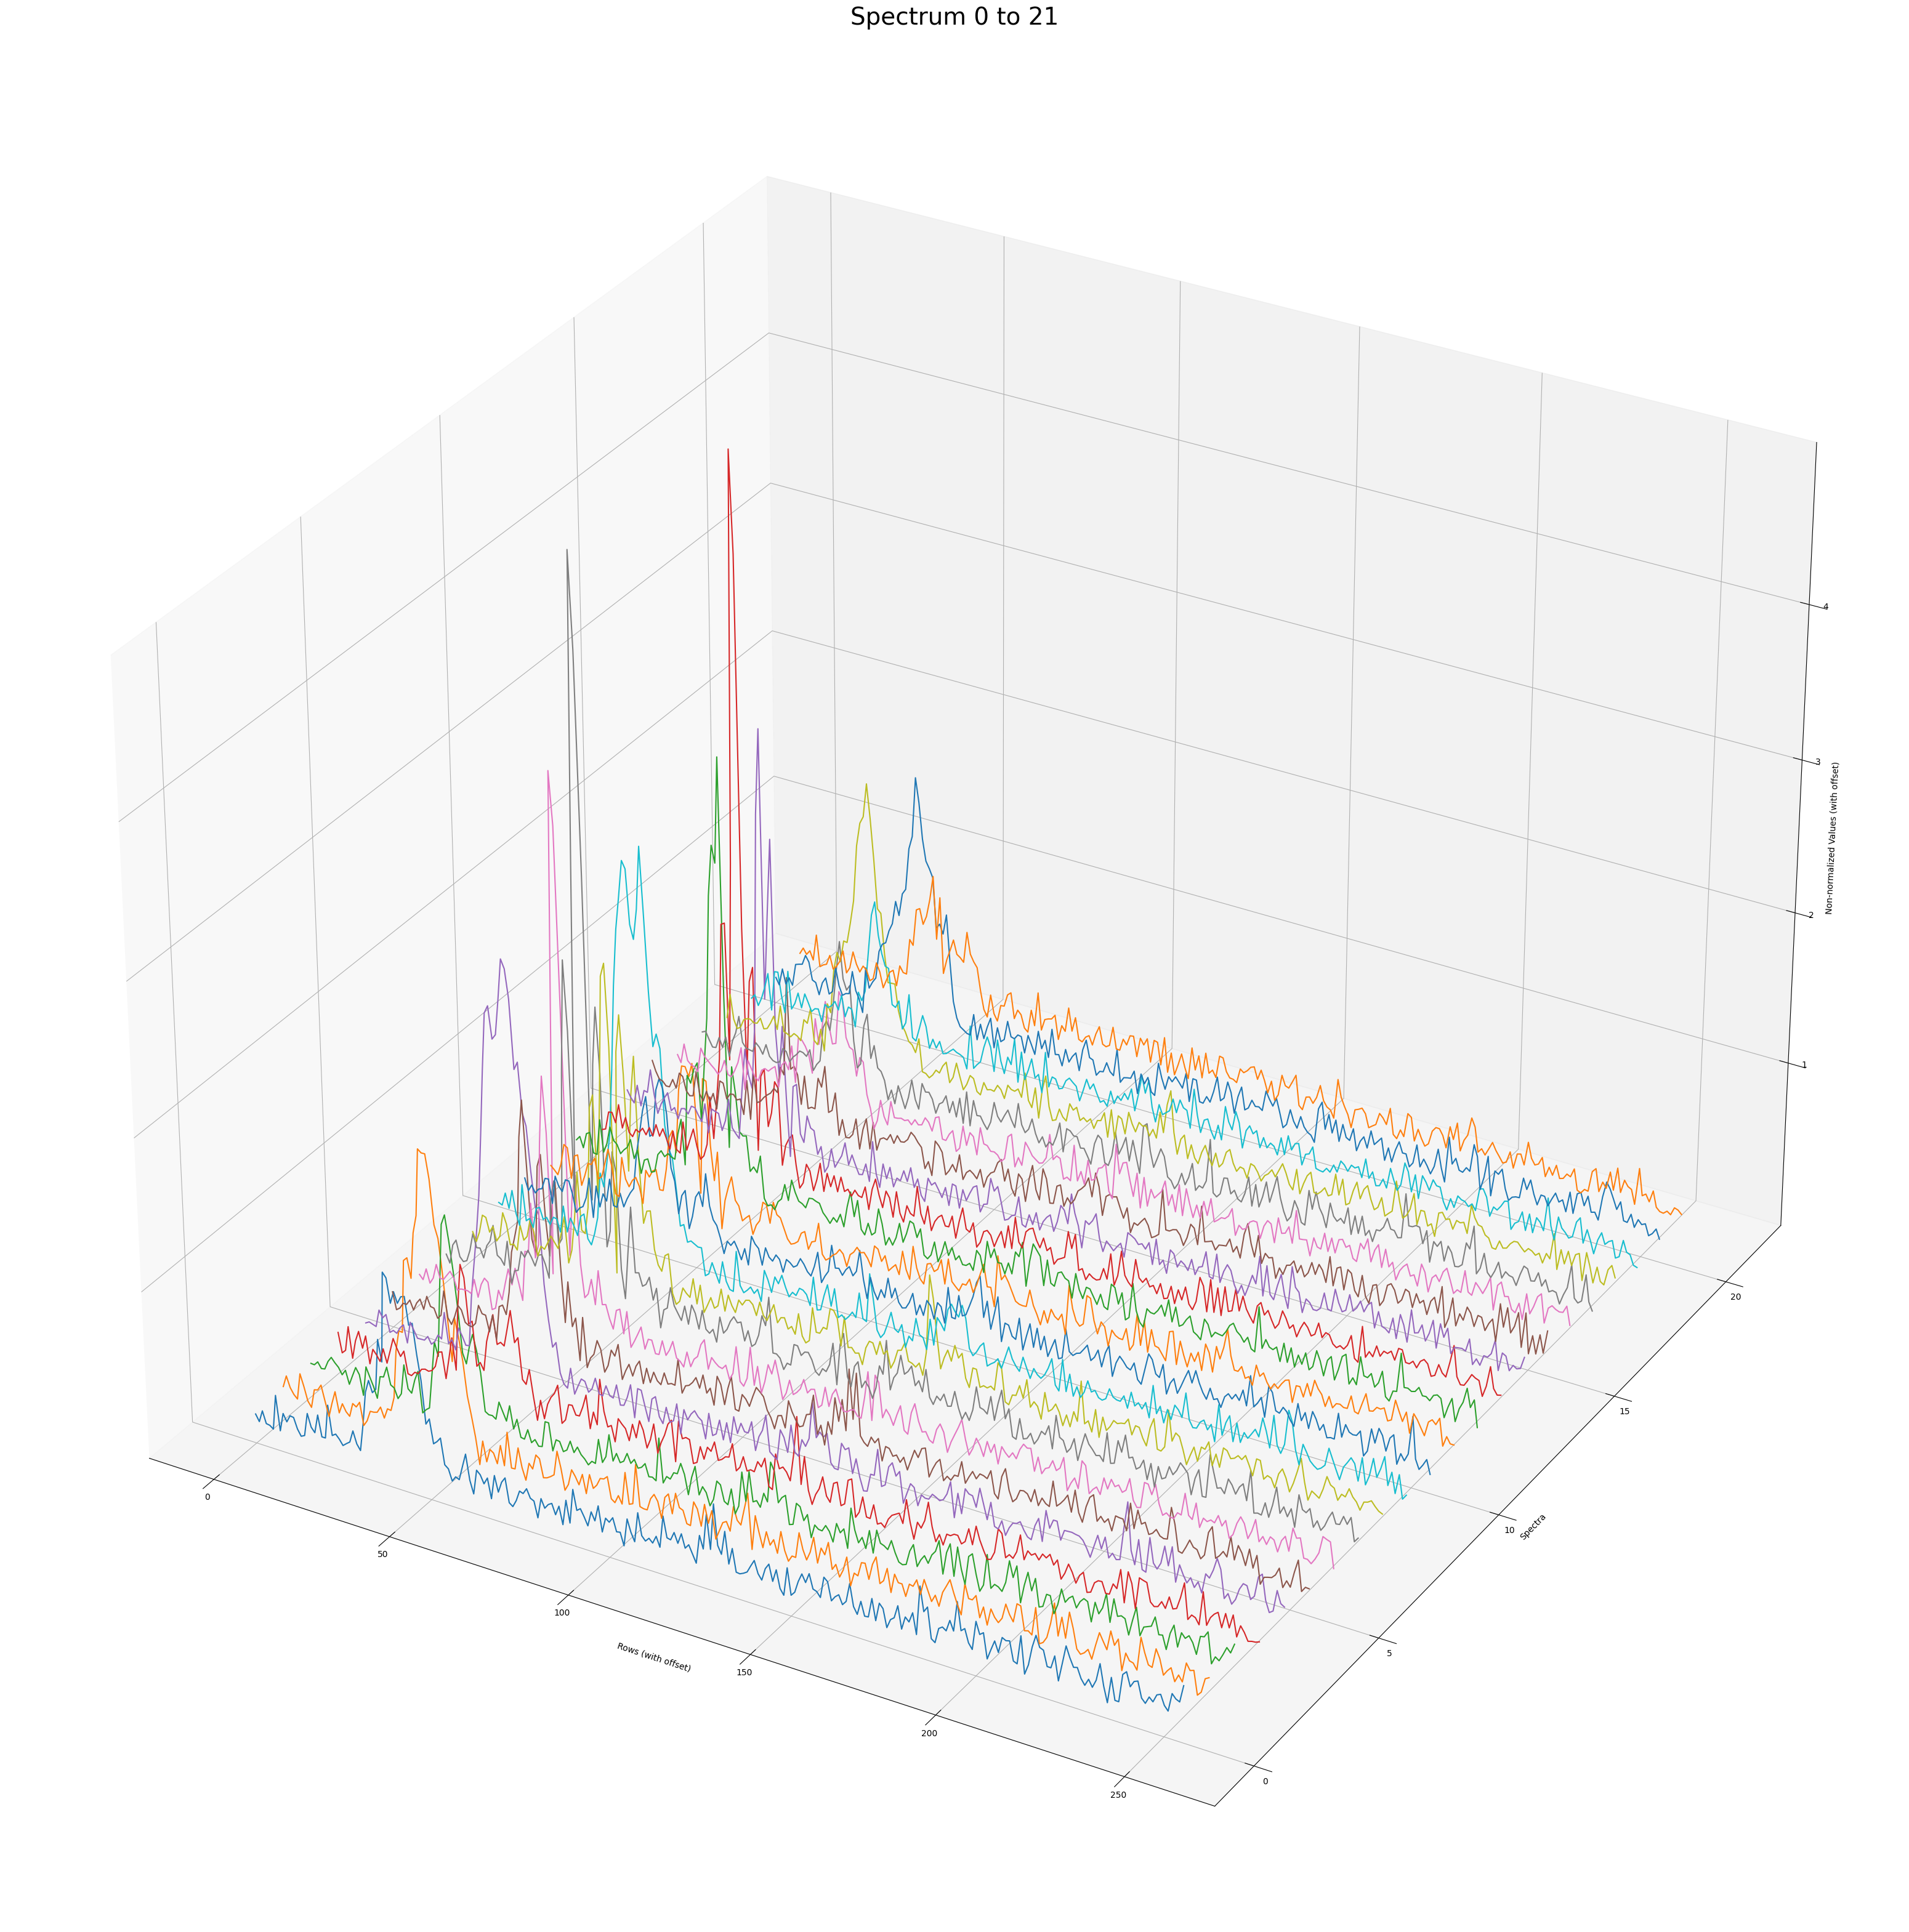

In [ ]:
plot_columns_with_offsets_no_norm_3d(peak_remove_data,0,21,0,0)

### Column 7 and 13 are what we want, set  thredshold to 4 x 10^6 based on above bar scale

In [ ]:
def find_largest_area(matrix, threshold):
    rows, cols = len(matrix), len(matrix[0])
    new_matrix = [[0] * cols for _ in range(rows)]

    for i in range(rows):
        for j in range(cols):
            neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
            for ni, nj in neighbors:
                if 0 <= ni < rows and 0 <= nj < cols and matrix[ni][nj] > threshold:
                    new_matrix[i][j] = matrix[i][j] * 10
                    break
            else:
                new_matrix[i][j] =  matrix[i][j]
    new_matrix = np.array(new_matrix)
    return new_matrix

In [ ]:
arr = find_largest_area(peak_remove_data,3000000

                        )

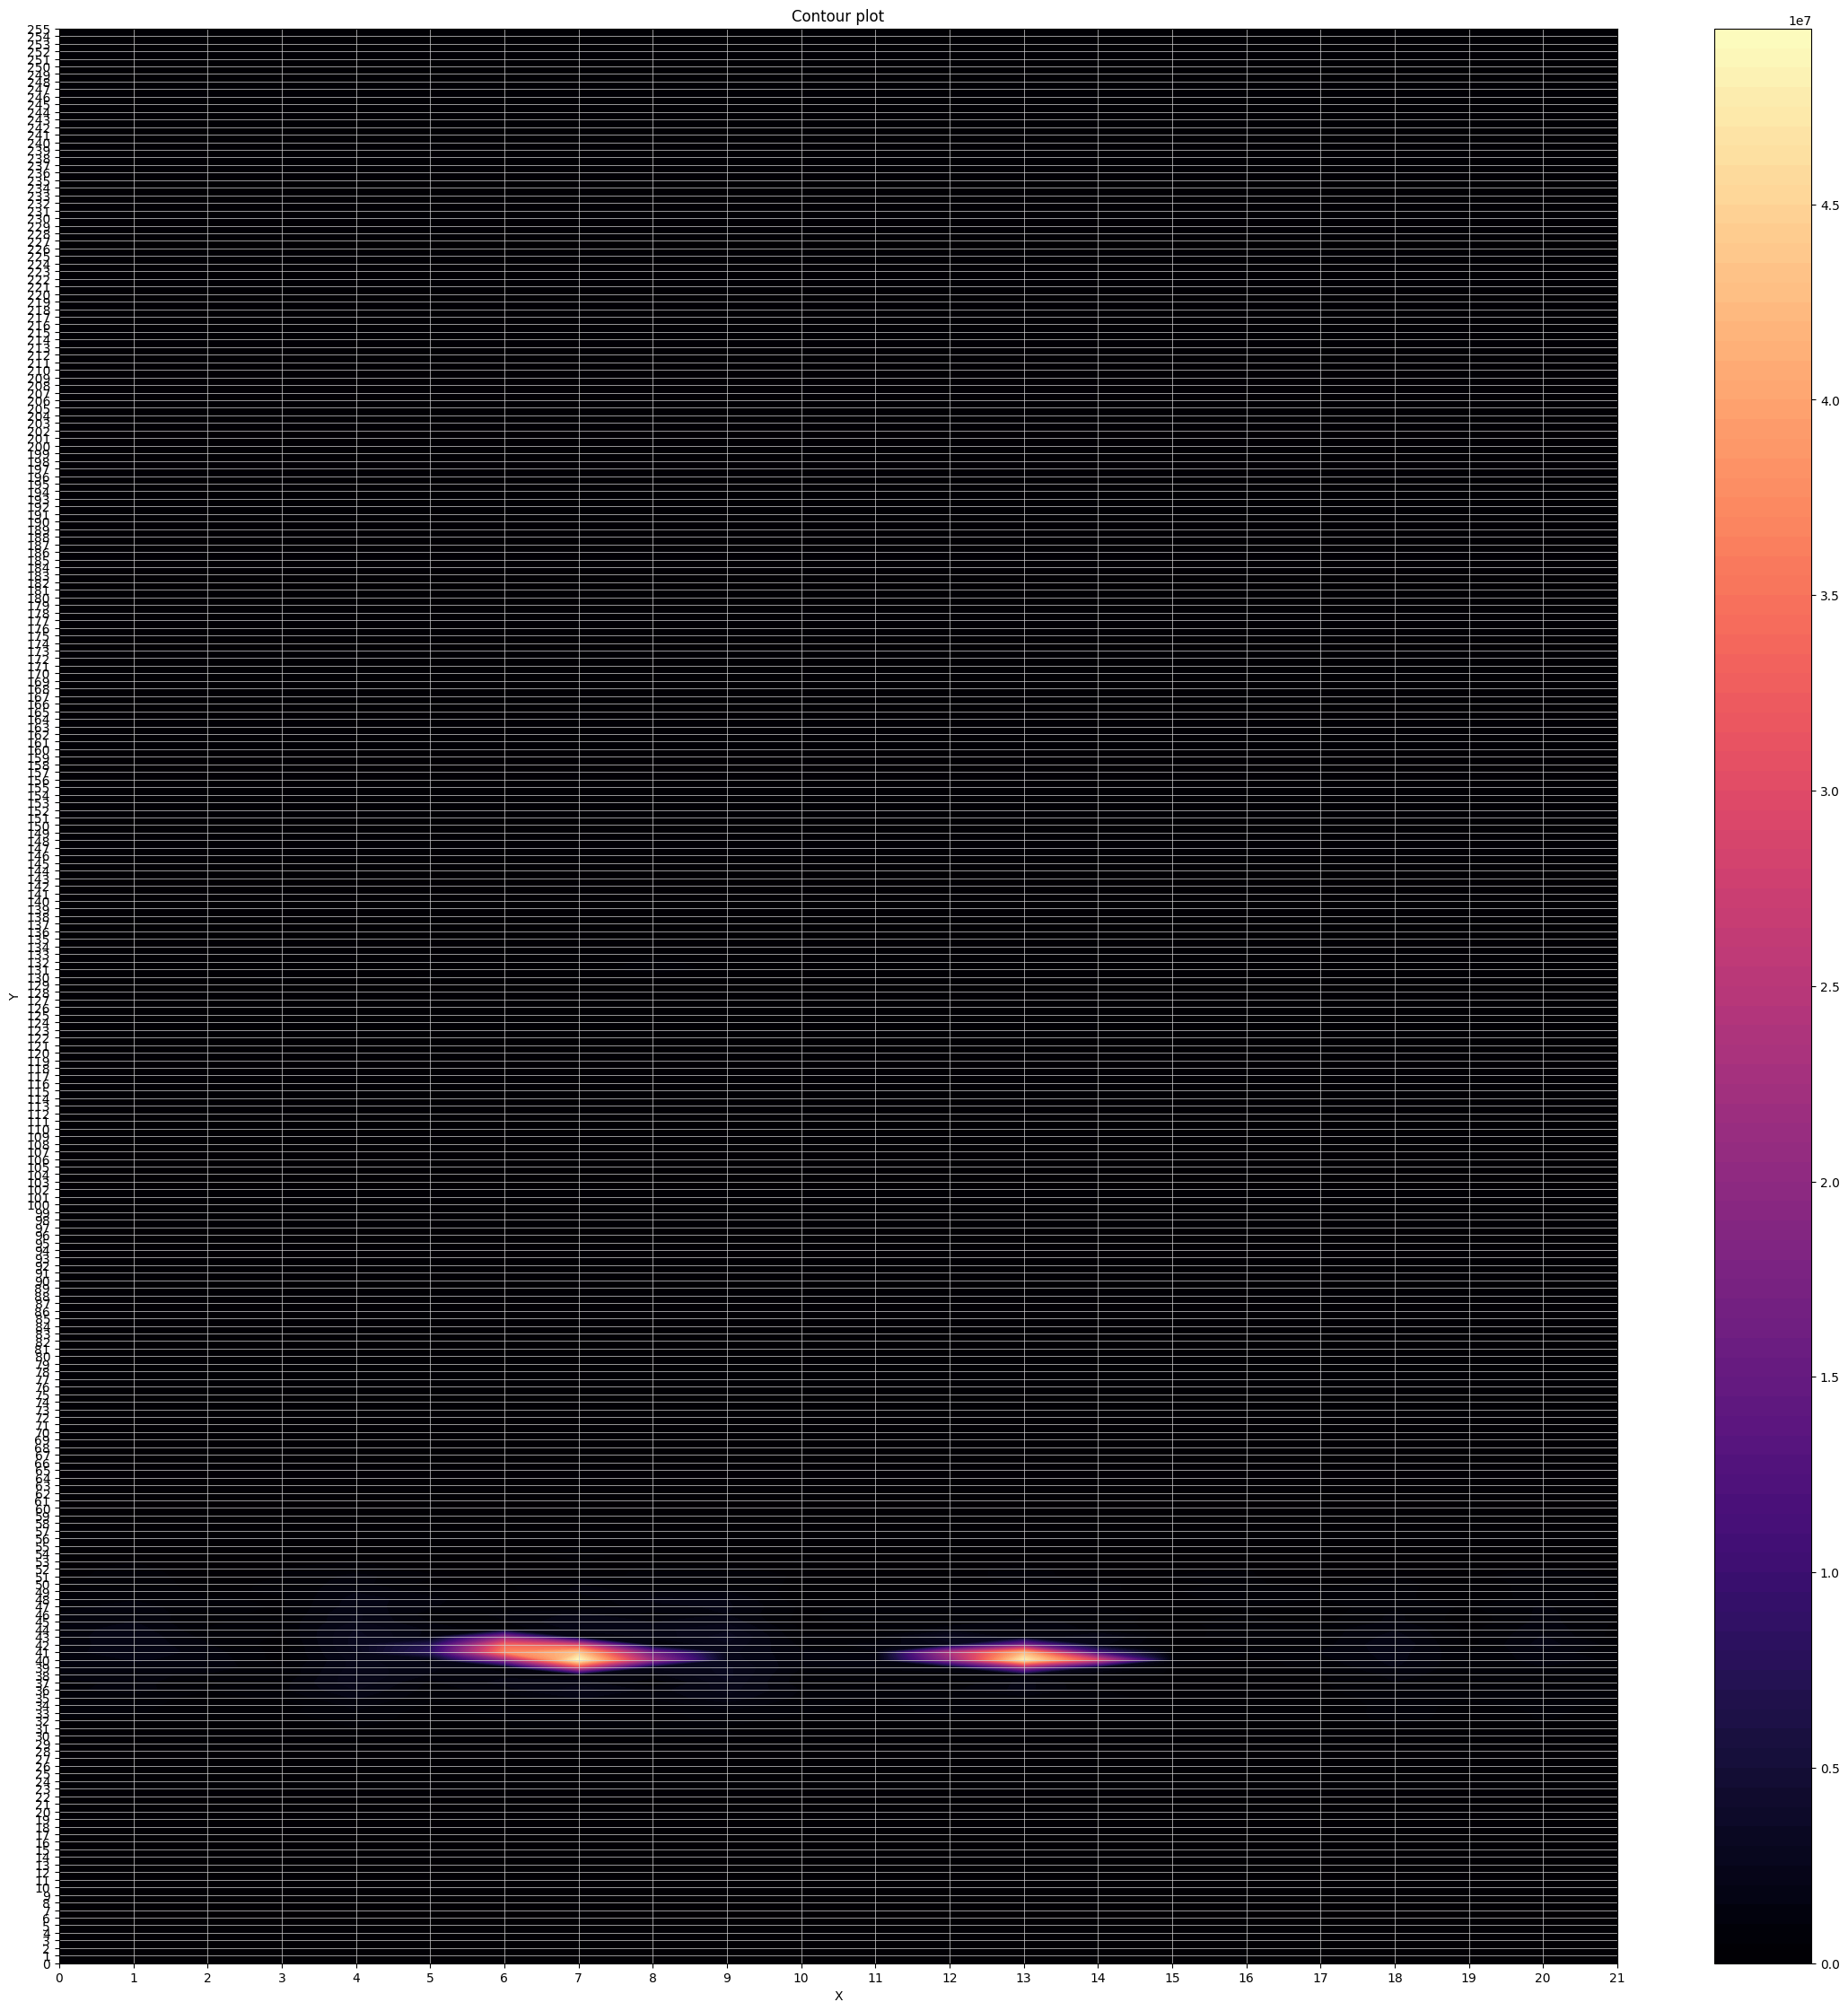

In [ ]:
plot_fft_contour(arr,grid_spacing=1, colormap='magma')

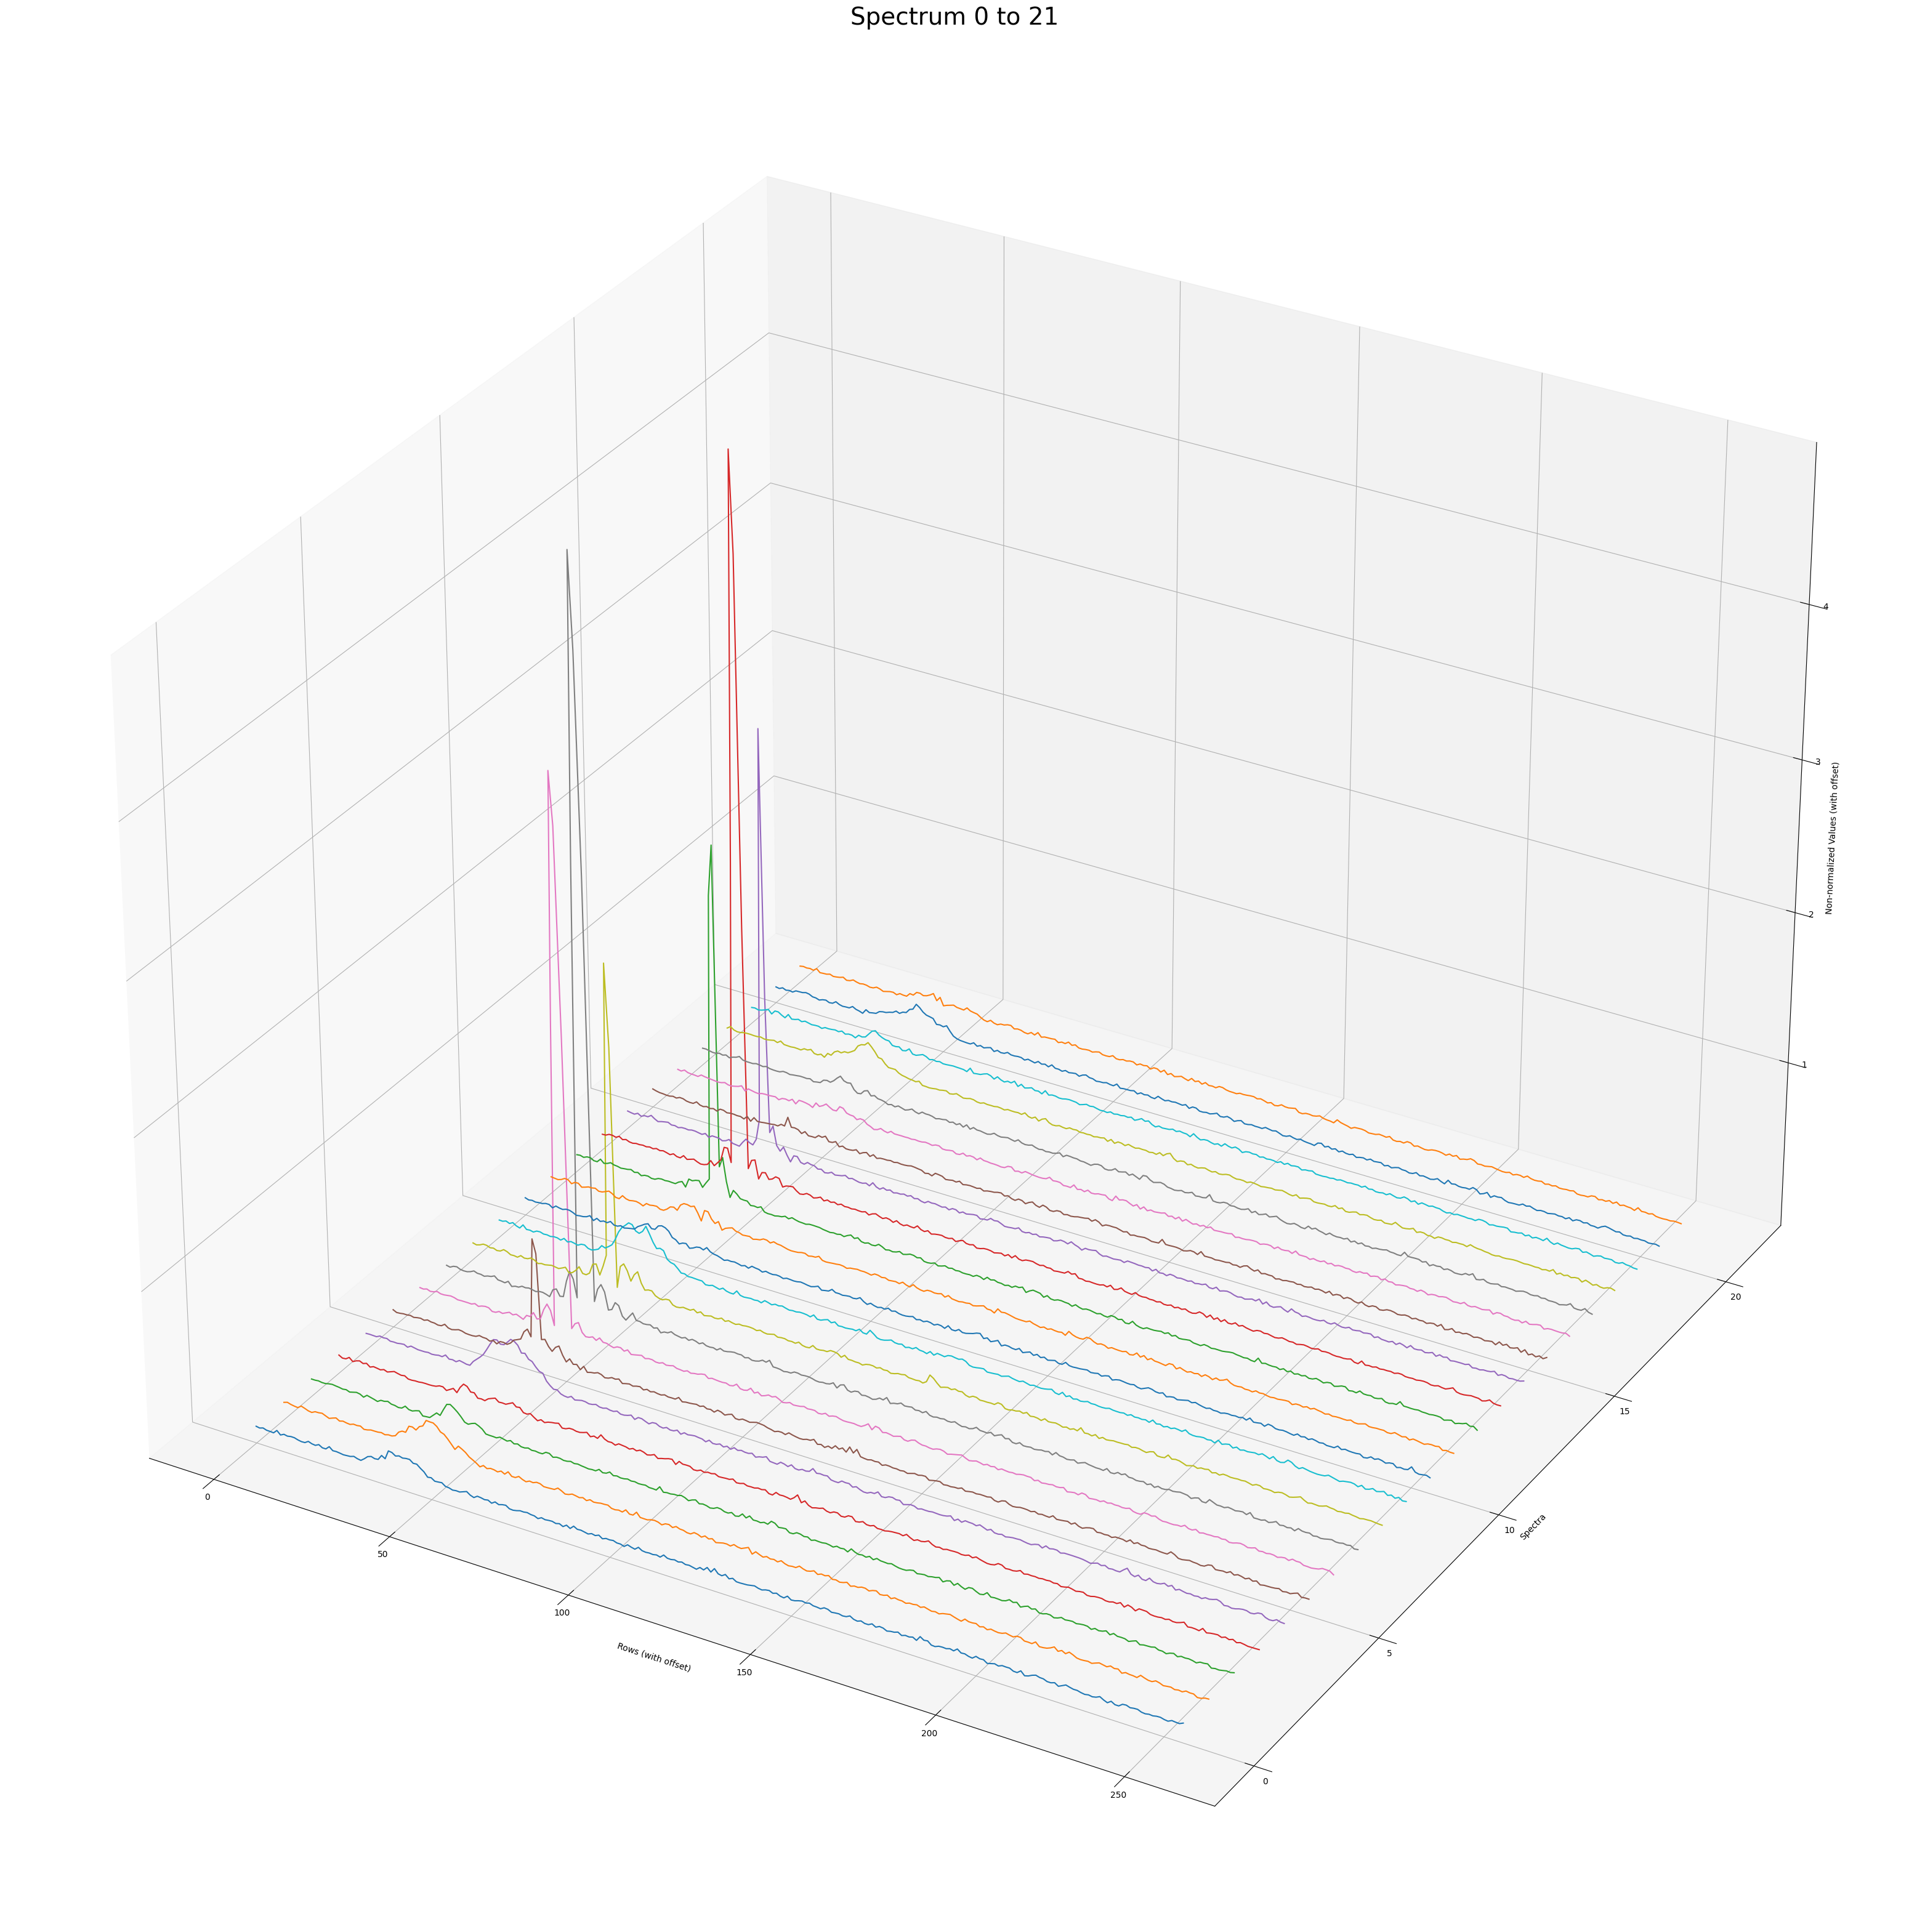

In [ ]:
plot_columns_with_offsets_no_norm_3d(arr,0,21,0,0)

In [ ]:
arr_1 = find_largest_area(test,3000000

                        )

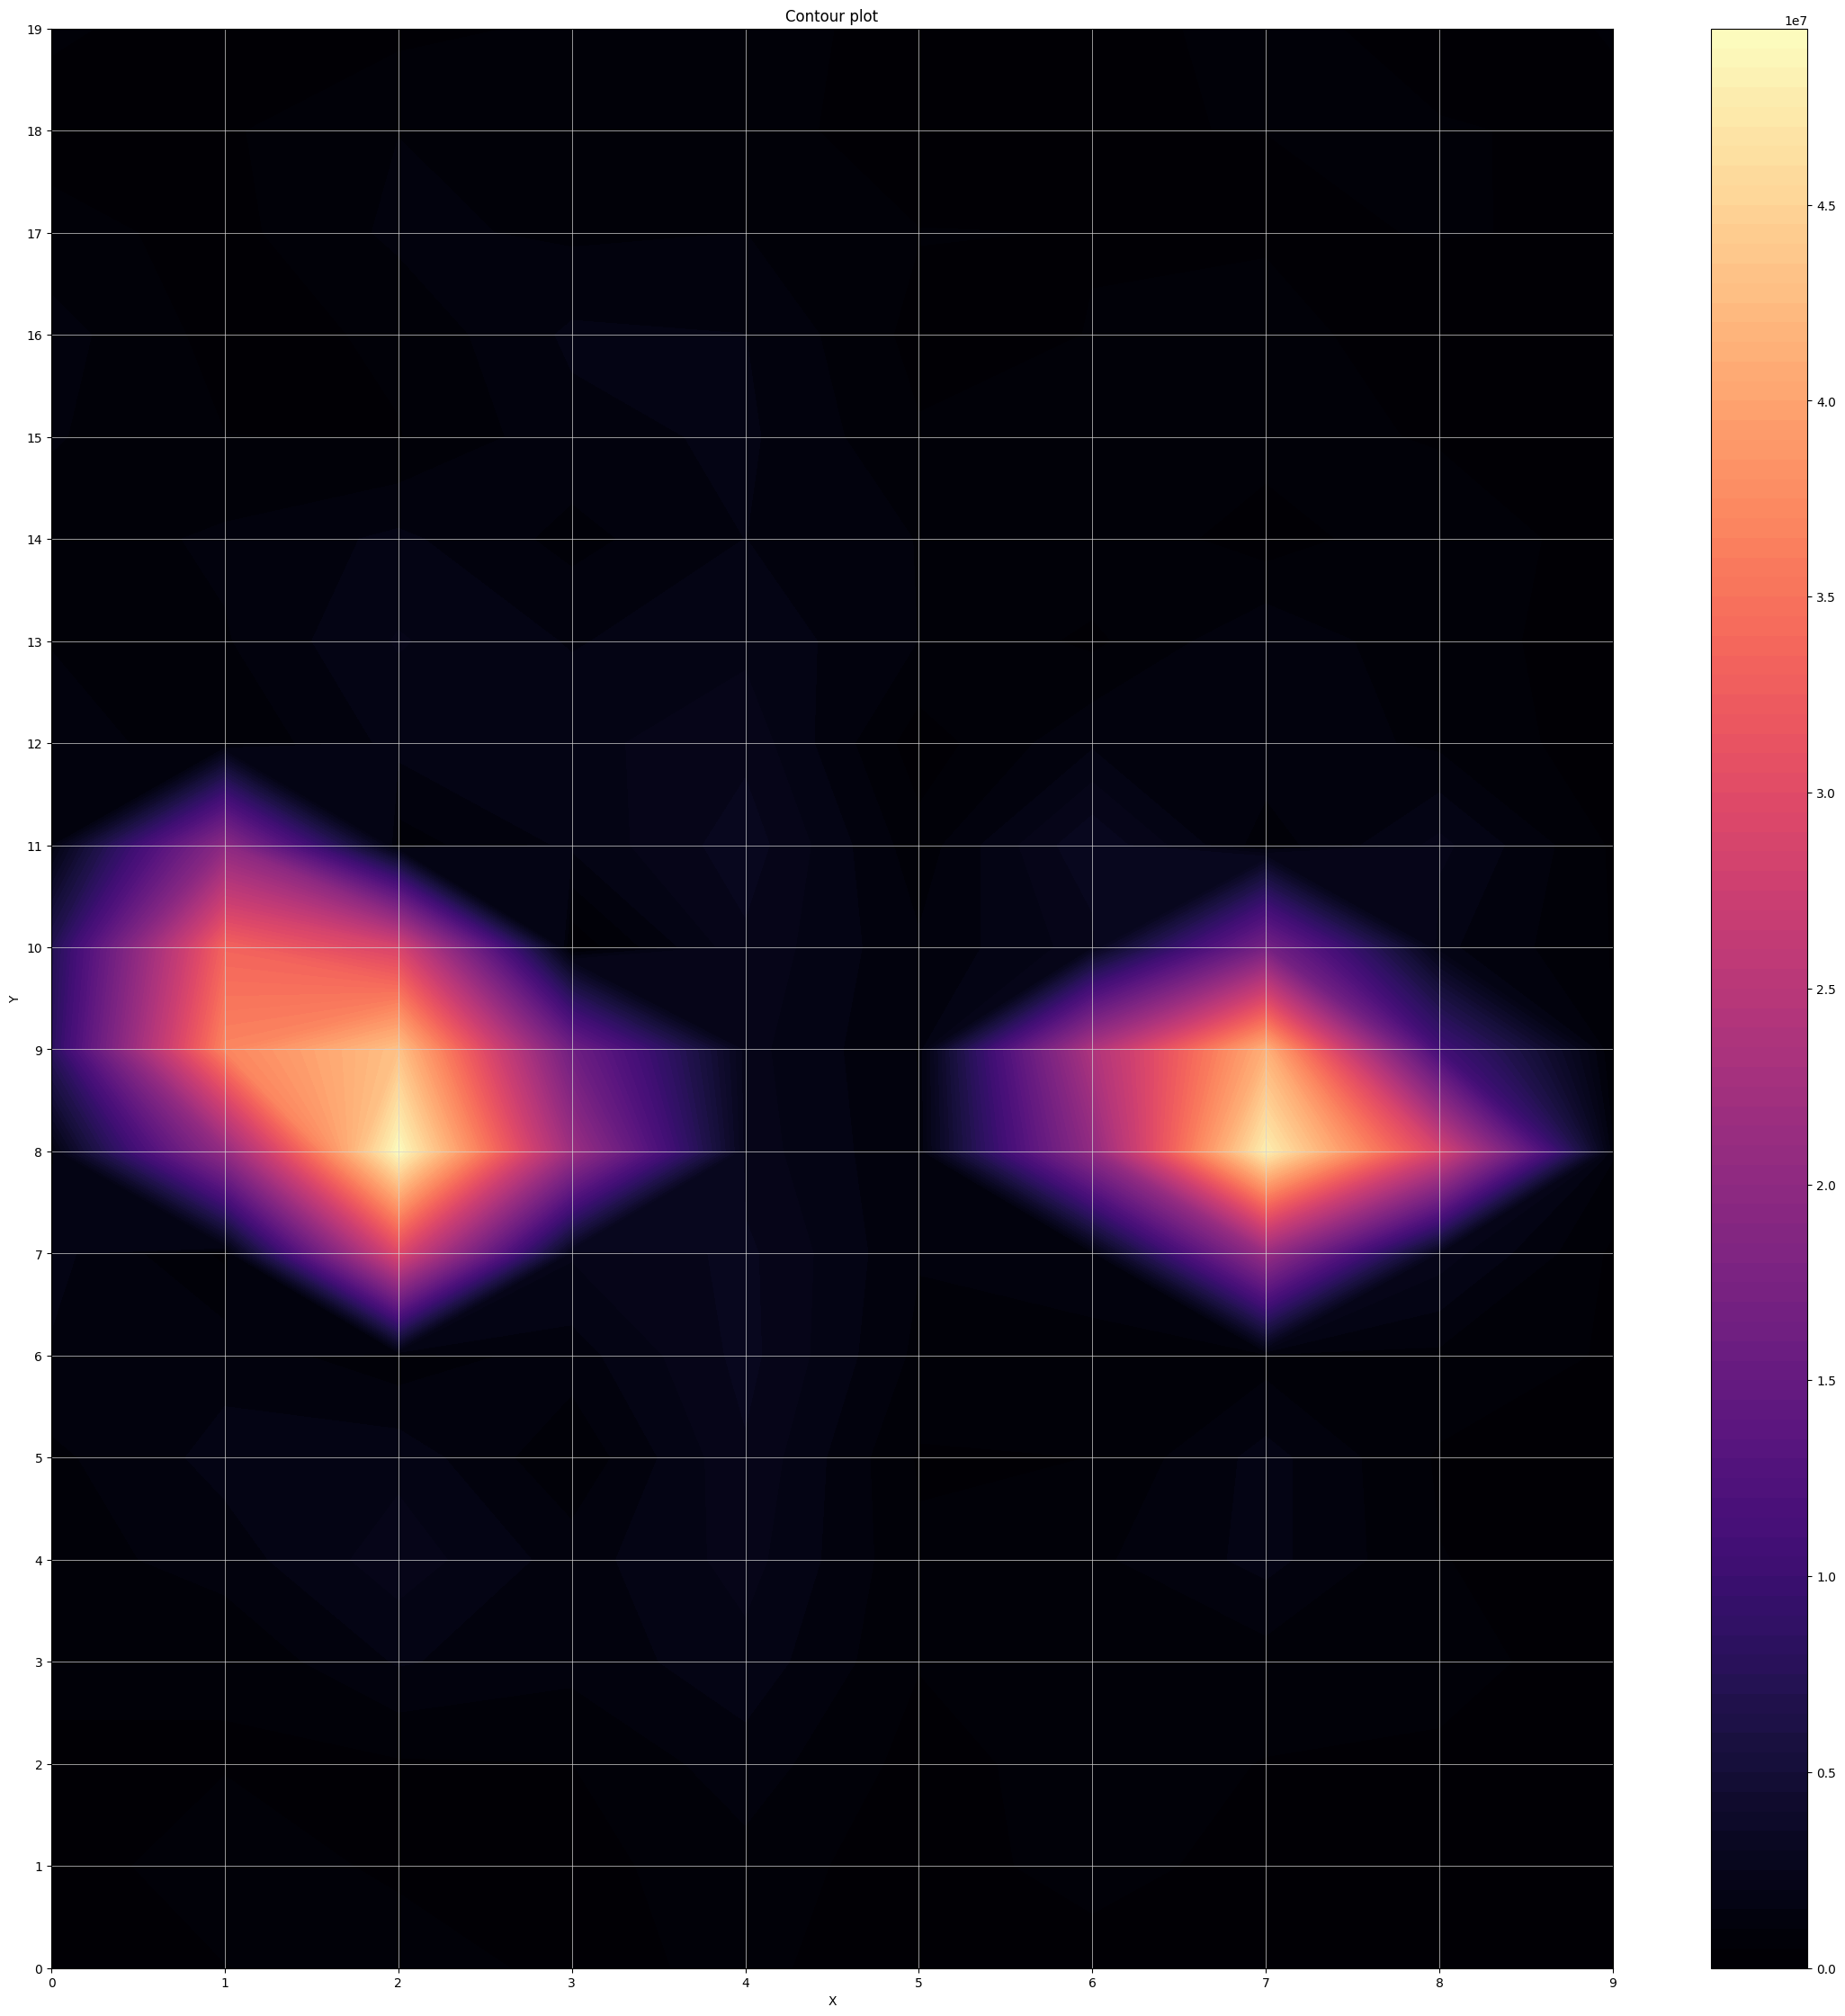

In [ ]:
plot_fft_contour(arr_1,grid_spacing=1, colormap='magma')

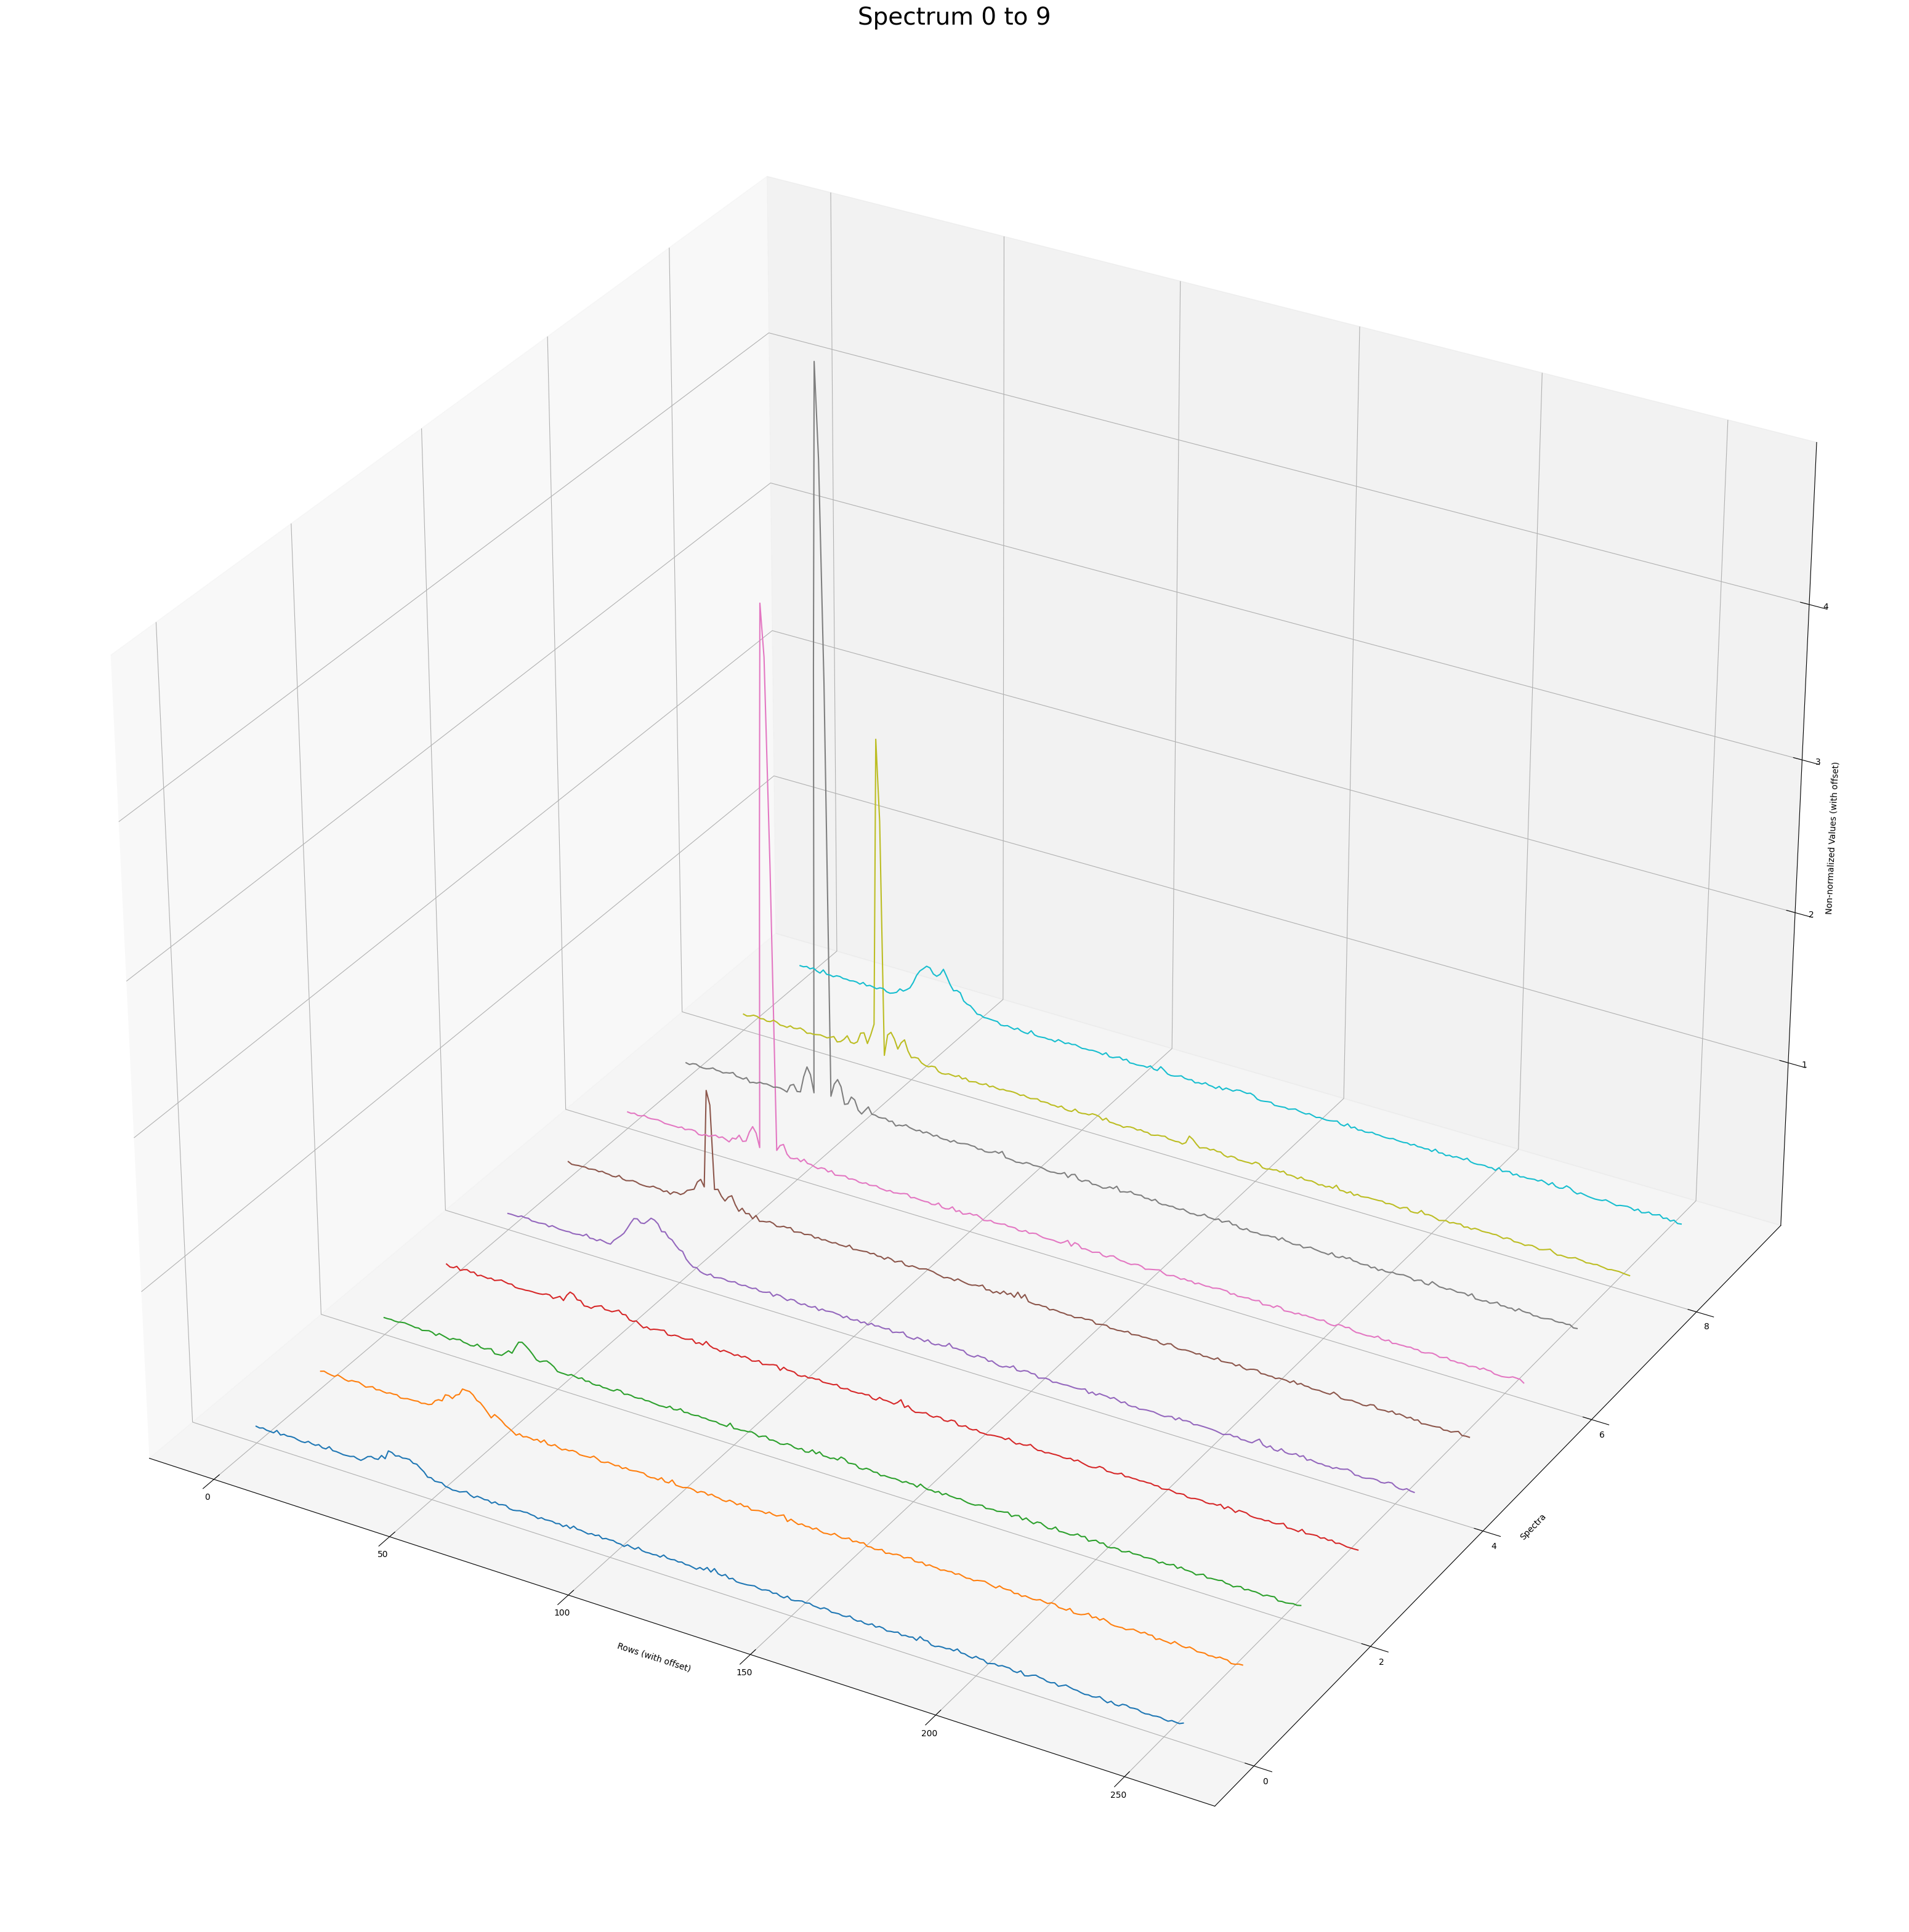

In [ ]:
plot_columns_with_offsets_no_norm_3d(arr,0,9,0,0)